<a href="https://colab.research.google.com/github/Lokeshwaran2975/Elevate-Labs-Task-3-Linear-Regression-/blob/main/Task_3_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

STEP 1 : Import the needed python libraries

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

STEP 2 : Import the Dataset

In [20]:
data = pd.read_csv("Housing.csv")
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


STEP 3 : Basic Exploration in dataset

In [21]:
data.head(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished


In [22]:
data.tail(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
535,2100000,3360,2,1,1,yes,no,no,no,no,1,no,unfurnished
536,1960000,3420,5,1,2,no,no,no,no,no,0,no,unfurnished
537,1890000,1700,3,1,2,yes,no,no,no,no,0,no,unfurnished
538,1890000,3649,2,1,1,yes,no,no,no,no,0,no,unfurnished
539,1855000,2990,2,1,1,no,no,no,no,no,1,no,unfurnished
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


In [23]:
print("\nDataset Info:")
data.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [24]:
print("\nData types:")
print(data.dtypes)


Data types:
price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object


In [25]:
data.describe(include='all')

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545,545,545,545,545,545.000000,545,545
unique,NaN,NaN,NaN,NaN,NaN,2,2,2,2,2,NaN,2,3
top,NaN,NaN,NaN,NaN,NaN,yes,no,no,no,no,NaN,no,semi-furnished
freq,NaN,NaN,NaN,NaN,NaN,468,448,354,520,373,NaN,417,227
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,NaN,NaN,NaN,NaN,NaN,0.693578,NaN,NaN
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,NaN,NaN,NaN,NaN,NaN,0.861586,NaN,NaN
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN


In [26]:
print(data.isnull().sum())

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


STEP 4 : Handle categorical data

In [27]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]
if y.dtype == 'object':
    y = y.astype('category').cat.codes
X_encoded = pd.get_dummies(X, drop_first=True)
print("\nEncoded feature columns:")
print(X_encoded.head())


Encoded feature columns:
      price  area  bedrooms  bathrooms  stories  parking  mainroad_yes  \
0  13300000  7420         4          2        3        2          True   
1  12250000  8960         4          4        4        3          True   
2  12250000  9960         3          2        2        2          True   
3  12215000  7500         4          2        2        3          True   
4  11410000  7420         4          1        2        2          True   

   guestroom_yes  basement_yes  hotwaterheating_yes  airconditioning_yes  \
0          False         False                False                 True   
1          False         False                False                 True   
2          False          True                False                False   
3          False          True                False                 True   
4           True          True                False                 True   

   prefarea_yes  
0          True  
1         False  
2          True  


STEP 5 : Train-test split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(436, 12) (109, 12) (436,) (109,)


In [29]:
print(X_train.head())
print(X_test.head())

       price  area  bedrooms  bathrooms  stories  parking  mainroad_yes  \
46   7525000  6000         3          2        4        1          True   
93   6300000  7200         3          2        1        3          True   
335  3920000  3816         2          1        1        2          True   
412  3430000  2610         3          1        2        0          True   
471  3010000  3750         3          1        2        0          True   

     guestroom_yes  basement_yes  hotwaterheating_yes  airconditioning_yes  \
46           False         False                False                 True   
93           False          True                False                 True   
335          False          True                False                 True   
412          False          True                False                False   
471          False         False                False                False   

     prefarea_yes  
46          False  
93          False  
335         False  


In [30]:
print(y_train.head())
print(y_test.head())

46     0
93     1
335    0
412    2
471    2
dtype: int8
316    2
77     0
360    1
90     1
493    0
dtype: int8


STEP 6 : Fit Linear Regression model

In [31]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

STEP 7 : Predict

In [32]:
y_pred = model.predict(X_test)
print(y_pred)

[1.21687152 0.95557682 1.25063093 0.90712097 1.3565944  1.17604798
 0.99463666 1.0650627  1.44700909 1.44888266 0.47822999 1.36237589
 1.4351342  1.25085216 1.20951353 1.58778921 1.27761963 0.74926098
 1.09297557 1.37448958 0.80898507 0.96068318 1.44082897 0.82140608
 0.89746509 0.17732158 1.12751054 0.92517472 0.41365171 1.30961097
 0.79861159 1.1382687  0.88765186 1.33404276 1.27032137 1.12817841
 0.76106431 1.07410513 1.4248696  1.40091267 0.98030956 1.22624061
 0.95422852 1.00433864 1.35685488 1.1008853  0.86643363 0.93060386
 1.39465924 1.13296572 0.54186539 1.29302086 1.17662567 1.18317179
 1.10917753 1.62574668 0.4504872  1.35382911 1.18880442 1.31848928
 0.97842358 1.43322322 0.92808125 1.16113652 1.02229397 0.70840016
 0.76180947 0.88663036 0.86568149 0.65662952 1.31440607 1.02609505
 1.24022492 0.90292442 1.18317401 0.92516546 0.94187528 1.15745182
 0.85440332 1.62866224 0.76786719 1.00622523 0.78563872 0.78107163
 1.36473774 0.62763484 1.35218151 1.06889968 0.10832779 0.3608

STEP 8 : Evaluate model

In [33]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"\nModel Evaluation Metrics:")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"R²: {r2:.2f}")


Model Evaluation Metrics:
MAE: 0.65
MSE: 0.61
R²: 0.03


STEP 9 : Coefficients

In [34]:
print("\nIntercept:", model.intercept_)
print("Coefficients:")
for feature, coef in zip(X_encoded.columns, model.coef_):
    print(f"{feature}: {coef}")


Intercept: 1.7294103226990083
Coefficients:
price: -1.081252109320941e-07
area: 1.6853813288717882e-05
bedrooms: 0.008917838889711923
bathrooms: 0.061918351913973206
stories: -0.05216099030577061
parking: -0.07631986514306528
mainroad_yes: -0.17331730785575186
guestroom_yes: -0.023373990566529286
basement_yes: -0.1518541587563576
hotwaterheating_yes: -0.03887822840798463
airconditioning_yes: -0.021264636614891894
prefarea_yes: 0.03612406303629406


STEP 10 : Plot

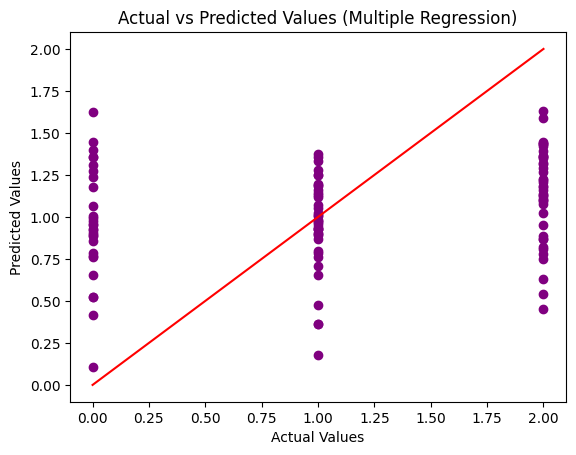

In [35]:
if X_encoded.shape[1] == 1:
    plt.scatter(X_test.iloc[:, 0], y_test, color='blue', label='Actual')
    plt.plot(X_test.iloc[:, 0], y_pred, color='red', linewidth=2, label='Predicted')
    plt.xlabel(X_test.columns[0])
    plt.ylabel(y.name)
    plt.title("Simple Linear Regression: Actual vs Predicted")
    plt.legend()
    plt.show()
else:
    plt.scatter(y_test, y_pred, color='purple')
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title("Actual vs Predicted Values (Multiple Regression)")
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')
    plt.show()
